In [1]:
import re
from collections import Counter
import pickle
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import warnings
import emoji
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df=pd.read_csv("/kaggle/input/paper-keyword/papers.csv")

In [3]:
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [4]:
df.shape


(7241, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7241 entries, 0 to 7240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7241 non-null   int64 
 1   year        7241 non-null   int64 
 2   title       7241 non-null   object
 3   event_type  2422 non-null   object
 4   pdf_name    7241 non-null   object
 5   abstract    7241 non-null   object
 6   paper_text  7241 non-null   object
dtypes: int64(2), object(5)
memory usage: 396.1+ KB


In [6]:
df.isnull().sum()

id               0
year             0
title            0
event_type    4819
pdf_name         0
abstract         0
paper_text       0
dtype: int64

In [7]:
mode=df["event_type"].mode()[0]
df["event_type"]=df["event_type"].replace("",pd.NA)
df["event_type"]=df["event_type"].fillna(mode)

In [8]:
df.isnull().sum()

id            0
year          0
title         0
event_type    0
pdf_name      0
abstract      0
paper_text    0
dtype: int64

In [9]:
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,Poster,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,Poster,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,Poster,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,Poster,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",Poster,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


# Extract word count from paper_text for additional numerical feature

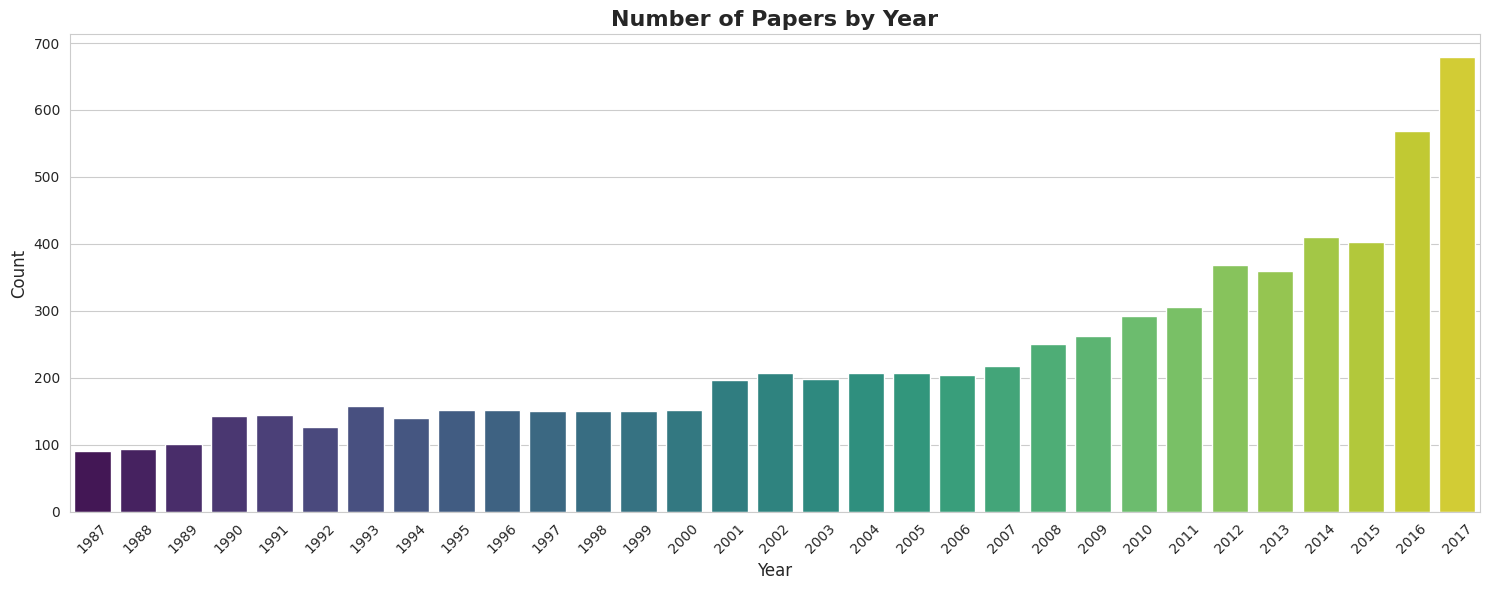

In [10]:
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['paper_text_word_count'] = df['paper_text'].apply(lambda x: len(x.split()))

# Set style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(data=df, x='year', palette='viridis')
plt.title('Number of Papers by Year', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram: Distribution of Title Word Count

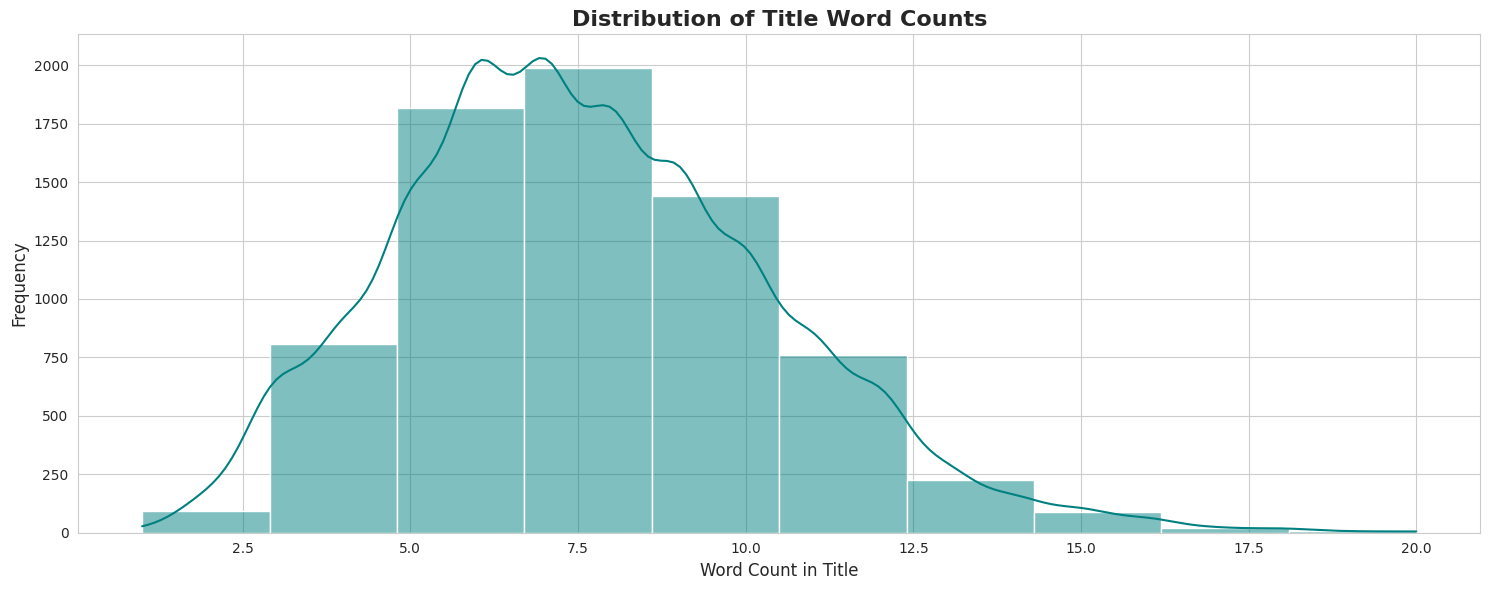

In [11]:
sns.histplot(df['title_word_count'], bins=10, kde=True, color='teal')
plt.title('Distribution of Title Word Counts', fontsize=16, weight='bold')
plt.xlabel('Word Count in Title', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

#  Word Cloud: Title Keywords

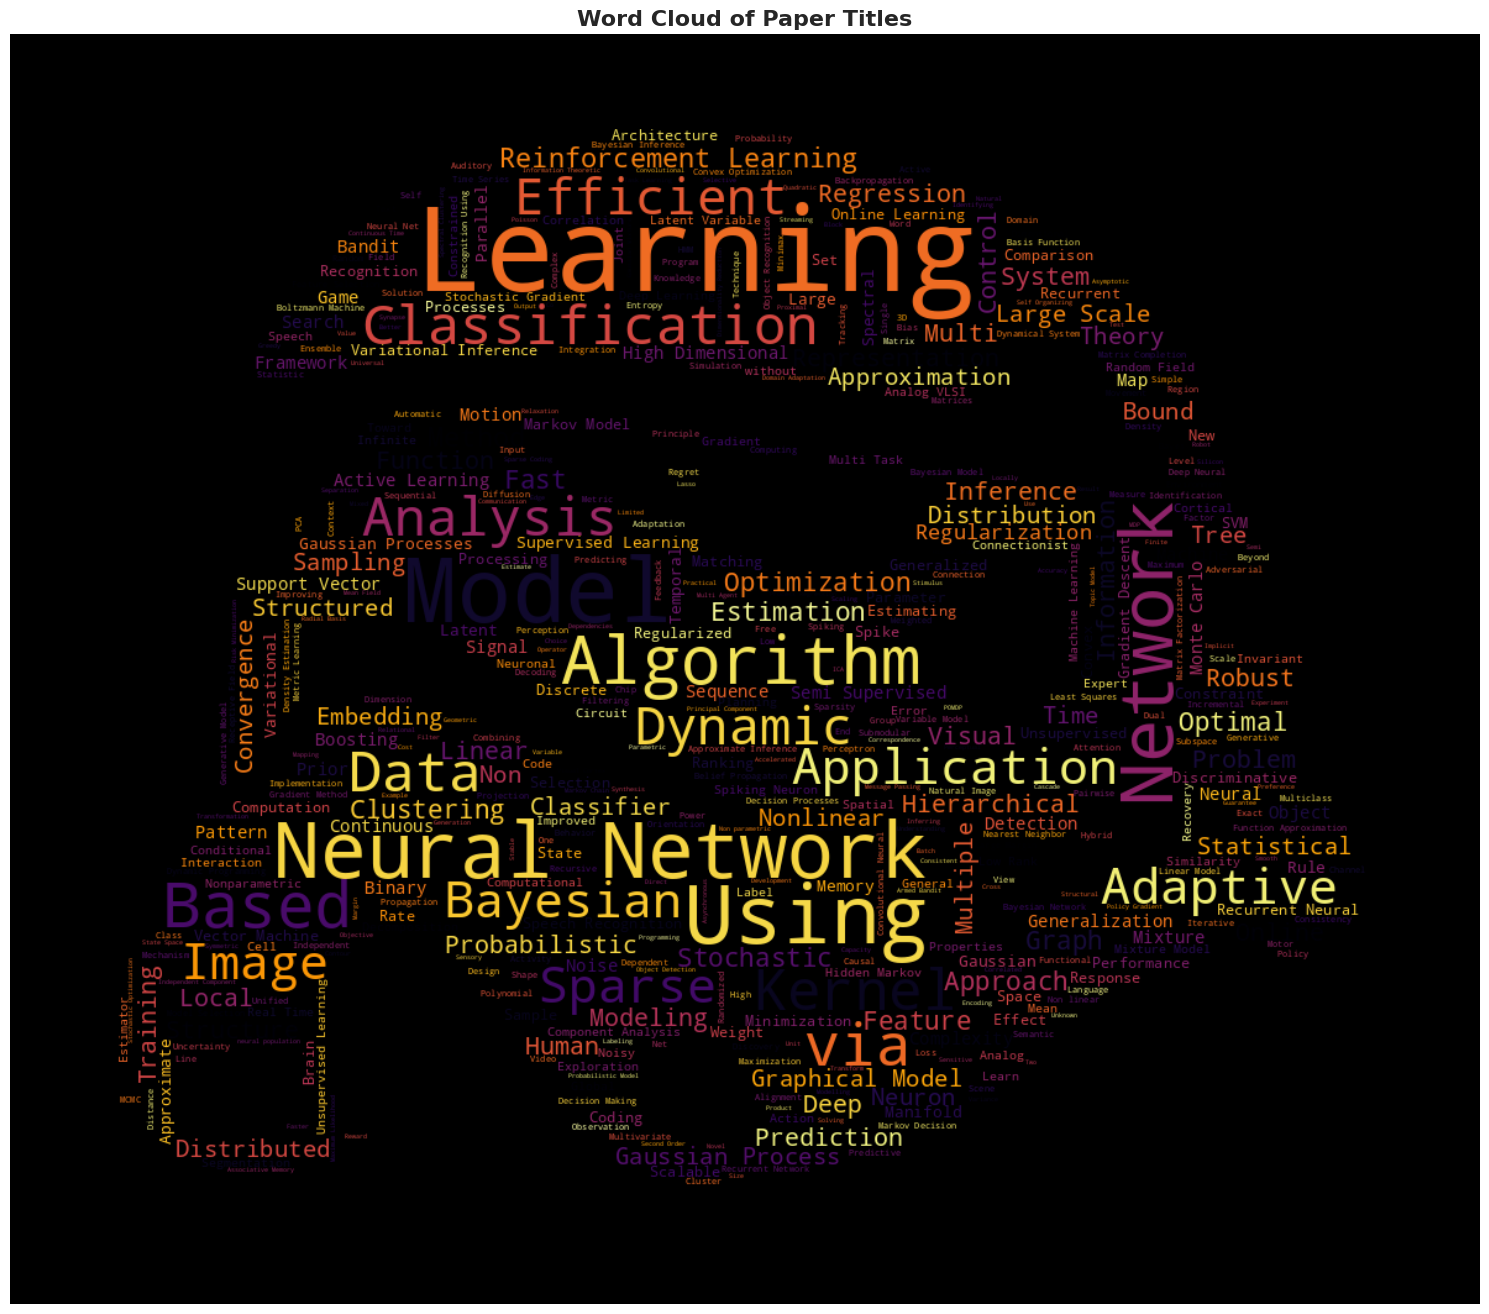

In [12]:
text = ' '.join(df['title'].values)
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/stormtrooper_mask.png"))
wordcloud = WordCloud(width=800, height=800, background_color='black', colormap='inferno', max_words=500,mask=mask).generate(text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Paper Titles', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


# Scatter Plot: ID vs Year

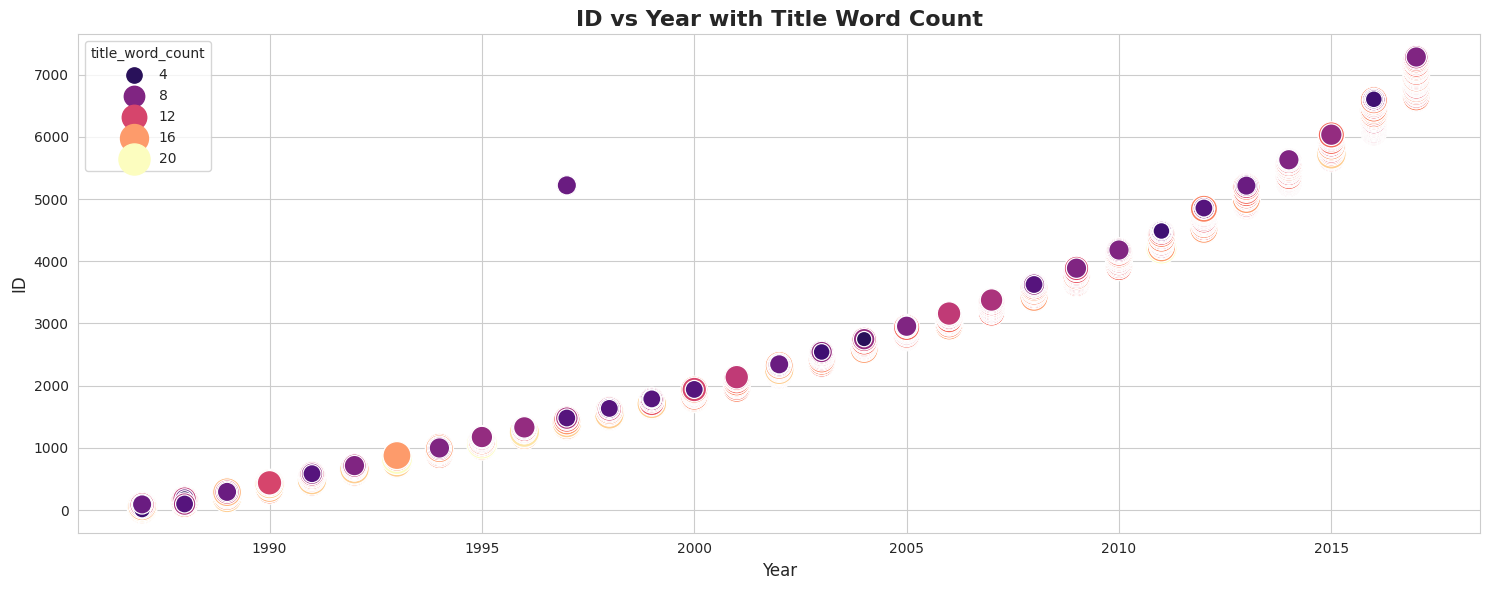

In [13]:
sns.scatterplot(data=df, x='year', y='id', size='title_word_count', hue='title_word_count', 
                palette='magma', sizes=(50, 500))
plt.title('ID vs Year with Title Word Count', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('ID', fontsize=12)
plt.tight_layout()
plt.show()

# Heatmap: Year vs Title Word Coun

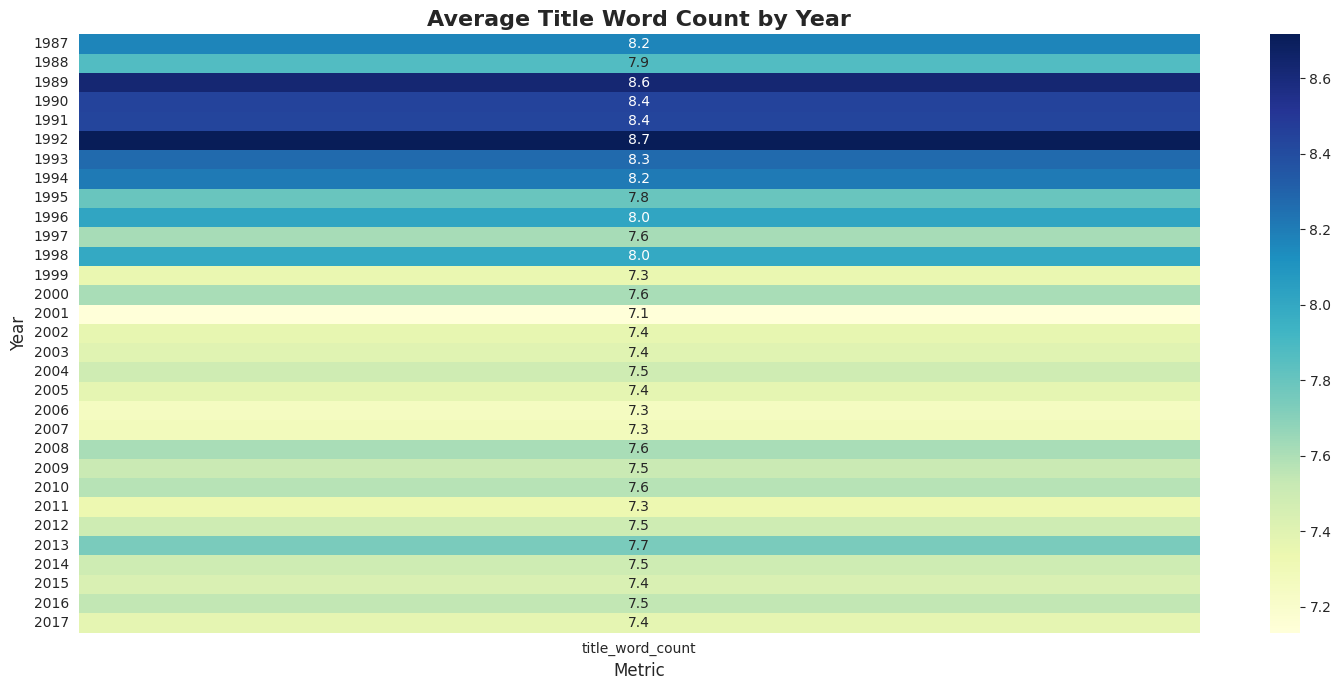

In [14]:
pivot_table = df.pivot_table(values='title_word_count', index='year', aggfunc='mean')
plt.figure(figsize=(15,7))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Average Title Word Count by Year', fontsize=16, weight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

# Bar Plot: Top Words in Titles


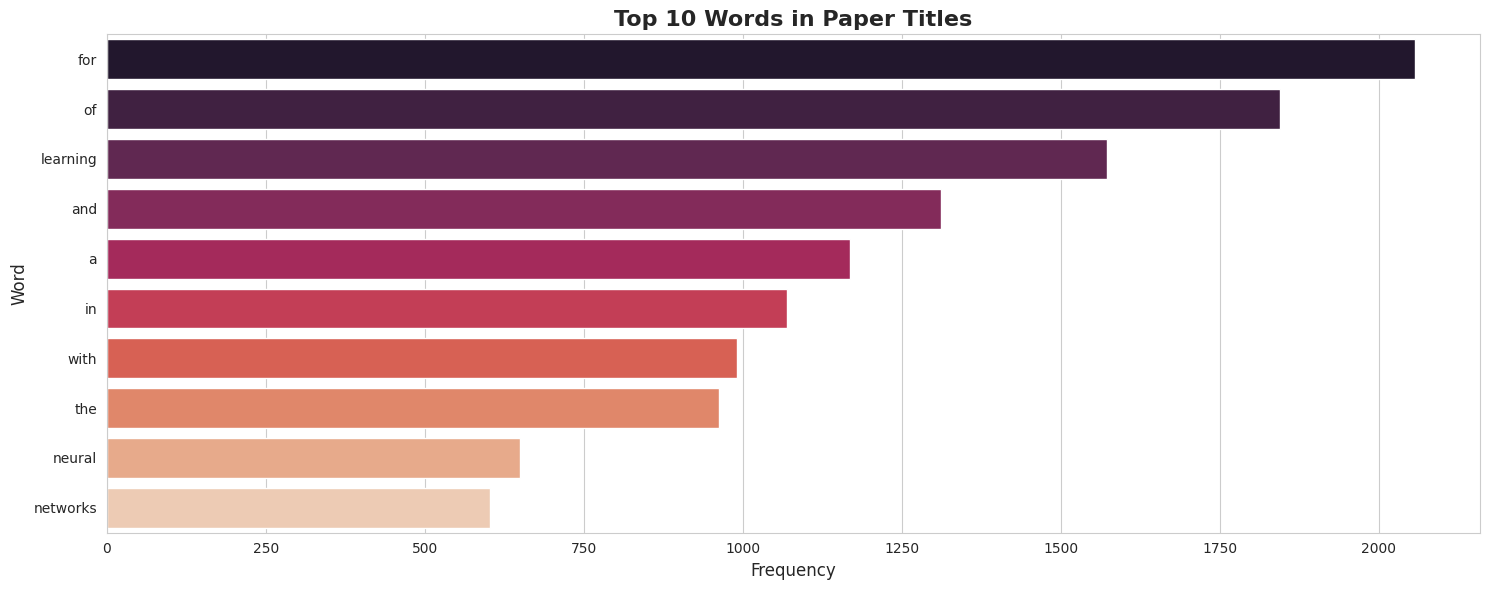

In [15]:
words = ' '.join(df['title']).lower()
words = re.findall(r'\b\w+\b', words)
word_freq = Counter(words)
top_words = pd.DataFrame(word_freq.most_common(10), columns=['Word', 'Frequency'])
sns.barplot(data=top_words, x='Frequency', y='Word', palette='rocket')
plt.title('Top 10 Words in Paper Titles', fontsize=16, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

# Pair Plot: Numerical Features

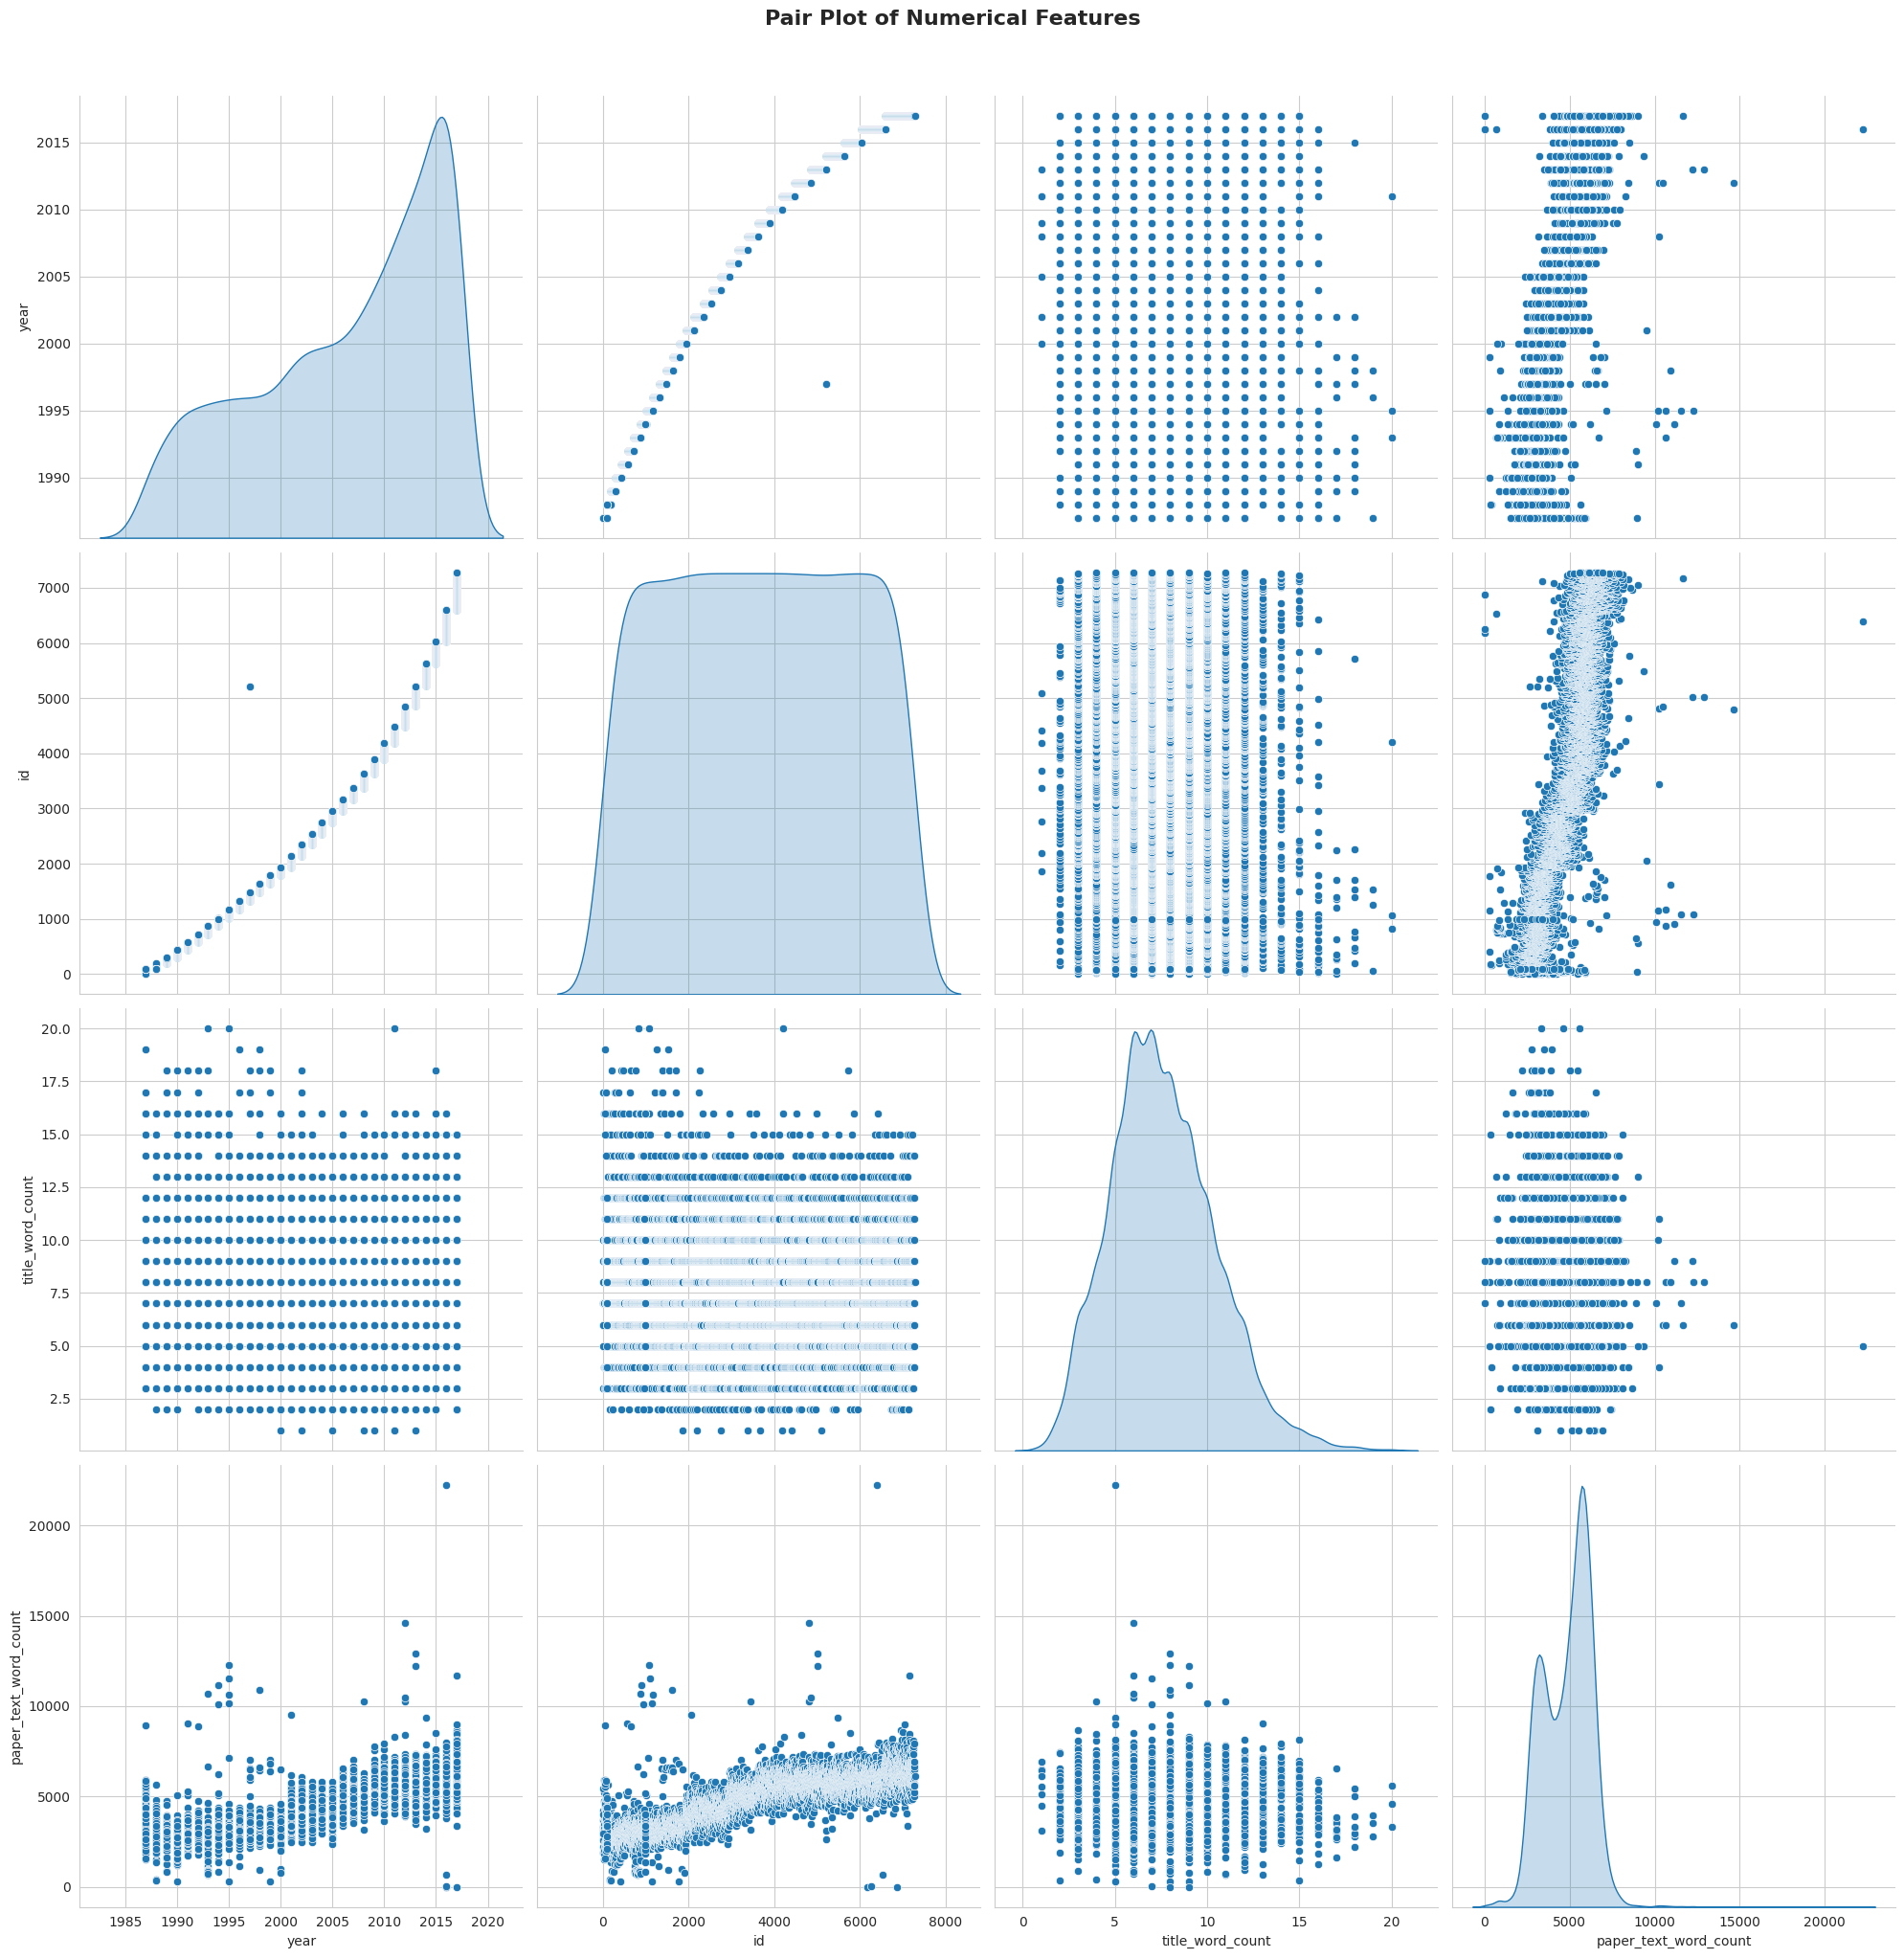

In [16]:
sns.pairplot(df[['year', 'id', 'title_word_count', 'paper_text_word_count']], diag_kind='kde', palette='husl',size=5)
plt.suptitle('Pair Plot of Numerical Features', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [17]:
lmtzr = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
new_words = ["fig", "figure", "image", "sample", "using", 
             "show", "result", "large", "also", "one", 
             "two", "three", "four", "five", "seven", 
             "eight", "nine"]
stop_words = stop_words.union(new_words)

def clean_text(text):
    """
    Clean the input text by removing HTML tags, emails, emojis, special characters,
    stopwords, short words, and applying lemmatization.
    
    Args:
        text (str): Input text to clean.
    
    Returns:
        str: Cleaned text as a single string.
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove HTML tags
    text = re.sub(r'</?.*?>', ' ', text)
    
    # Remove email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', ' ', text)
    
    # Remove emojis
    text = emoji.replace_emoji(text, replace=' ')
    
    # Remove special characters and digits
    text = re.sub(r'(\d|\W)+', ' ', text)
    
    # Convert to list of words
    text = text.split()
    
    # Remove stopwords
    text = [word for word in text if word not in stop_words]
    
    # Remove words less than 3 letters
    text = [word for word in text if len(word) >= 3]
    
    # Lemmatize
    text = [lmtzr.lemmatize(word) for word in text]
    
    # Join words back into a single string
    return ' '.join(text)

In [18]:
from tqdm.notebook import tqdm
tqdm.pandas()
df['paper_text'] = df['paper_text'].progress_apply(clean_text)

  0%|          | 0/7241 [00:00<?, ?it/s]

# Combine all cleaned text for word frequency analysis

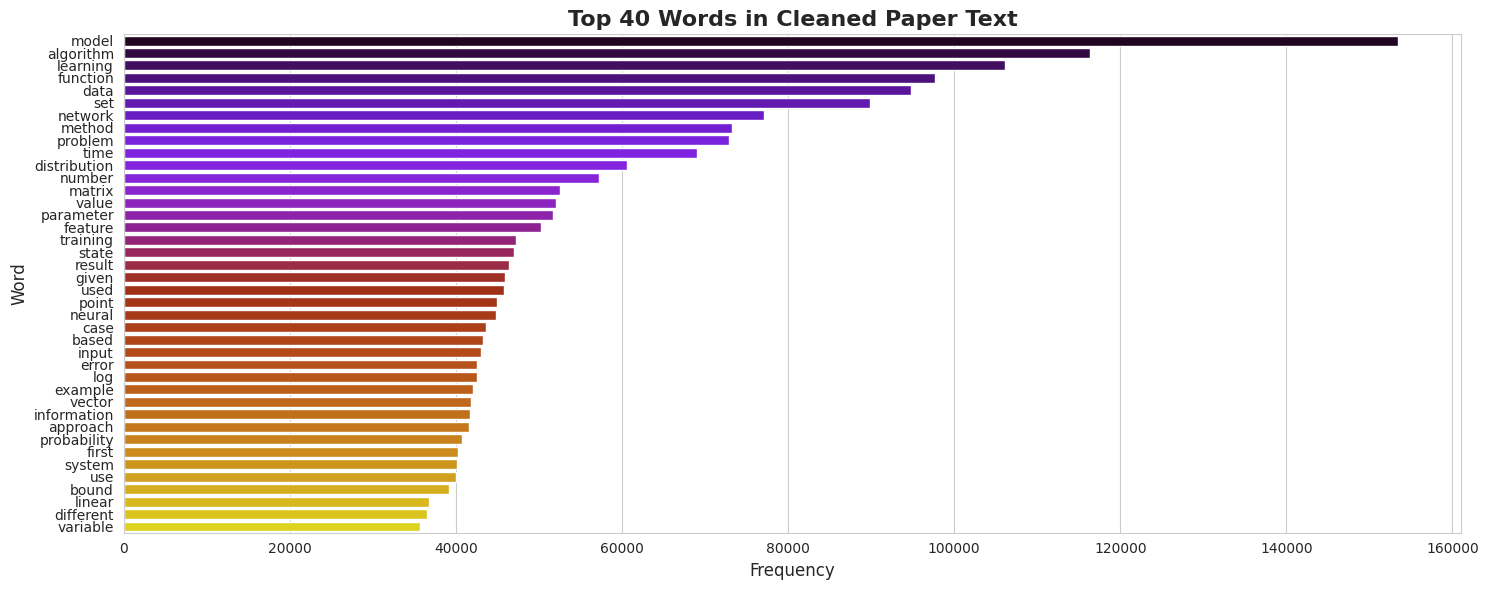

In [19]:
all_cleaned_text = ' '.join(df['paper_text'])
words = all_cleaned_text.split()
word_freq = Counter(words)
top_words = pd.DataFrame(word_freq.most_common(40), columns=['Word', 'Frequency'])
plt.figure(figsize=(15, 6))
sns.barplot(data=top_words, x='Frequency', y='Word', palette='gnuplot')
plt.title('Top 40 Words in Cleaned Paper Text', fontsize=16, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
df=df.head(3000)

In [21]:
text=df["paper_text"]
sentences=text.tolist()
print(f"Sentence Length : {len(sentences)}")

Sentence Length : 3000


In [22]:
text_data=" ".join(sentences)
text_data[: 1000]

'self organization associative database application hisashi suzuki suguru arimoto osaka university toyonaka osaka japan abstract efficient method self organizing associative database proposed together application robot eyesight system proposed database associate input output first half part discussion algorithm self organization proposed aspect hardware produce new style neural network latter half part applicability handwritten letter recognition autonomous mobile robot system demonstrated introduction let mapping given finite infinite set another finite infinite set learning machine observes set pair sampled randomly mean cartesian product computes estimate make small estimation error measure usually say faster decrease estimation error increase number sample better learning machine however expression performance incomplete since lack consideration candidate assumed preliminarily find good learning machine clarify conception let discus type learning machine let advance understanding s

In [23]:
def create_list(text):
 
    words=re.findall(r"\w+",text)
    return words

words=create_list(text_data)

vocab = set(tqdm(words, desc="Building Vocabulary"))

print(f"There are {len(vocab)} unique words in the vocabulary.")

Building Vocabulary:   0%|          | 0/5471206 [00:00<?, ?it/s]

There are 89901 unique words in the vocabulary.


In [24]:
def create_dict(word):
    word_count={}
    word_count=Counter(word)
    return word_count

word_count_dic=create_dict(words)
example=dict(list(word_count_dic.items())[: 5])
print(f"Create Word into Dict : {example}")

Create Word into Dict : {'self': 1607, 'organization': 708, 'associative': 680, 'database': 1864, 'application': 5620}


In [25]:
def word_prob(word_count_dict):
    probs={}
    m=sum(word_count_dict.values())

    for key in word_count_dict.keys():
        probs[key]=word_count_dict.get(key,0)/m

    return probs


word_proba=word_prob(word_count_dic)
print(f"Word Probability : {dict(list(word_proba.items())[: 5])}")

Word Probability : {'self': 0.00029371951997420677, 'organization': 0.00012940474184302327, 'associative': 0.00012428704018821443, 'database': 0.00034069271016298785, 'application': 0.0010271958321437724}


In [26]:
def delete_letter(word,verbose=False):
    delete=[]
    split=[]

    split=[(word[: i],word[i:]) for i in range(len(word))]
    delete=[L + R[1:] for L,R in split if R]

    if verbose:
        
        print(f"input word {word}, \nsplit = {split}, \ndelete = {delete}")


    return delete


print(f"Delete Letter : {delete_letter(word='help',verbose=True)}")

input word help, 
split = [('', 'help'), ('h', 'elp'), ('he', 'lp'), ('hel', 'p')], 
delete = ['elp', 'hlp', 'hep', 'hel']
Delete Letter : ['elp', 'hlp', 'hep', 'hel']


In [27]:
def switch_letter(word, verbose=False):
    def swap(c, i, j):
        c = list(c)
        c[i], c[j] = c[j], c[i]
        return ''.join(c)

    switch = []
    split = []
    split = [(word[:i], word[i:]) for i in range(len(word))]
    switch = [a + b[1] + b[0] + b[2:] for a, b in split if len(b) >= 2]

    if verbose:
        print(f"Input word = {word} \nsplit_l = {split} \nswitch_l = {switch}")

    return switch


print(f"Switch Letter : {switch_letter(word='eta',verbose=True)}")

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']
Switch Letter : ['tea', 'eat']


In [28]:
def replace_letter(word,verbose=False):
    letters= 'abcdefghijklmnopqrstuvwxyz'
    replace=[]
    split=[]

    split= [(word[:i], word[i:]) for i in range(len(word))]
    replace = [a + l + (b[1:] if len(b) > 1 else '') for a, b in split if b for l in letters]
    replace_set = set(replace)
    replace_set.remove(word)
    # turn the set back into a list and sort it, for easier viewing
    replace= sorted(list(replace_set))

    if verbose:
        print(f"Input word = {word} \nsplit = {split} \nreplace {replace}")
    return replace

print(f"Replace Letter : {replace_letter(word='can',verbose=True)}")

Input word = can 
split = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']
Replace Letter : ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fa

In [29]:
def insert_letter(word, verbose=False):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert = []
    split = []
    split = [(word[:i], word[i:]) for i in range(len(word))]
    insert = [ a + l + b for a, b in split for l in letters]

    if verbose:
        print(f"Input word {word} \nsplit = {split} \ninsert = {insert}")

    return insert


print(f"Insert Letter : {insert_letter(word='on',verbose=True)}")

Input word on 
split = [('', 'on'), ('o', 'n')] 
insert = ['aon', 'bon', 'con', 'don', 'eon', 'fon', 'gon', 'hon', 'ion', 'jon', 'kon', 'lon', 'mon', 'non', 'oon', 'pon', 'qon', 'ron', 'son', 'ton', 'uon', 'von', 'won', 'xon', 'yon', 'zon', 'oan', 'obn', 'ocn', 'odn', 'oen', 'ofn', 'ogn', 'ohn', 'oin', 'ojn', 'okn', 'oln', 'omn', 'onn', 'oon', 'opn', 'oqn', 'orn', 'osn', 'otn', 'oun', 'ovn', 'own', 'oxn', 'oyn', 'ozn']
Insert Letter : ['aon', 'bon', 'con', 'don', 'eon', 'fon', 'gon', 'hon', 'ion', 'jon', 'kon', 'lon', 'mon', 'non', 'oon', 'pon', 'qon', 'ron', 'son', 'ton', 'uon', 'von', 'won', 'xon', 'yon', 'zon', 'oan', 'obn', 'ocn', 'odn', 'oen', 'ofn', 'ogn', 'ohn', 'oin', 'ojn', 'okn', 'oln', 'omn', 'onn', 'oon', 'opn', 'oqn', 'orn', 'osn', 'otn', 'oun', 'ovn', 'own', 'oxn', 'oyn', 'ozn']


In [30]:
def edit_one_letter(word, allow_switches=True):

    edit_one_set = set()
    edit_one_set.update(delete_letter(word))
    if allow_switches:
        edit_one_set.update(switch_letter(word))
    edit_one_set.update(replace_letter(word))
    edit_one_set.update(insert_letter(word))

    return edit_one_set


def edit_two_letters(word, allow_switches=True):

    edit_two_set = set()
    edit_one = edit_one_letter(word, allow_switches=allow_switches)
    for w in edit_one:
        if w:
            edit_two = edit_one_letter(w, allow_switches=allow_switches)
            edit_two_set.update(edit_two)

    return edit_two_set

In [31]:
print(f"Edit Two Letters : {list(edit_two_letters('country'))[: 20]}")

Edit Two Letters : ['cozmuntry', 'cdountrm', 'counrtury', 'cogntrh', 'couujry', 'conntrgy', 'fouotry', 'xountrgy', 'cboufntry', 'gcfuntry', 'cdunnry', 'countrhi', 'counnrly', 'countcrpy', 'counztrhy', 'counqstry', 'wountqy', 'couytuy', 'counytrc', 'zcomuntry']


In [32]:
def word_corrections(word,probs,vocab,verbose=False):
    suggestions=[]
    n_best=[]


    suggestions=list(edit_two_letters(word).intersection(vocab))

    n_best= [[s, probs.get(s, -1)] for s in list(reversed(suggestions))]

    if verbose:
        print(f"Suggestions : {suggestions}")

    return n_best

In [33]:
probs = word_prob(word_count_dic)
my_word = 'propose'
tmp_corrections = word_corrections(my_word, probs, vocab, verbose=False)
for i, word_prob in enumerate(tmp_corrections):
    print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")

word 0: roose, probability 0.000001
word 1: proposed, probability 0.000831
word 2: promise, probability 0.000021
word 3: propoesd, probability 0.000000
word 4: provoke, probability 0.000001
word 5: purpose, probability 0.000223
word 6: repose, probability 0.000000
word 7: prognose, probability 0.000000
word 8: propo, probability 0.000000
word 9: porpoise, probability 0.000000
word 10: proposer, probability 0.000000
word 11: propose, probability 0.000377
word 12: proposi, probability 0.000000
word 13: proposes, probability 0.000030
word 14: proove, probability 0.000000
word 15: propoi, probability 0.000000
word 16: protos, probability 0.000000
word 17: oppose, probability 0.000000
word 18: rpose, probability 0.000000
word 19: apropos, probability 0.000000
word 20: ppose, probability 0.000000
word 21: prope, probability 0.000000
word 22: prose, probability 0.000001
word 23: provost, probability 0.000004
word 24: propoj, probability 0.000000
word 25: promote, probability 0.000005
word 26:

# Save pkl

In [34]:
file=open("word_probability.pkl","wb")
pickle.dump(probs,file)
file.close()

In [35]:
file=open("vocab.pkl","wb")
pickle.dump(vocab,file)
file.close()

In [36]:
! pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.18
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
alembic==1.15.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.1
arrow==1.3.0
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.3.31.0.36.18
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
bayesian-optimization==2.0.3
beartype==0.20.2
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.2.1
blobfile==3.0.0
blosc2==3.2.1
bokeh==3.6.3
Boruta==0.4.3
boto3==1.38.11
botocore==1.38.11
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper